# **Customer Segmentation and Dimensionality Reduction: A Study in Unsupervised Learning**
## **Assignment-8(Week 8 and 9)**


# **NAME : AMPA RANJAN**
## **ROLL NO : 23051406**
### **SECTION : CSE-13**

### **Setup and Data Loading**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Define the URL as a string (wrapped in quotes)
url = "https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv"

# 2. Pass the variable 'url' into the read_csv function
df = pd.read_csv(url)

# 3. Rename columns if necessary (sometimes GitHub versions have slightly different spacing)
# This ensures the column names match your selection below
df.columns = ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# 4. Selection of features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

print("Dataset Preview:")
display(df.head())

Dataset Preview:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### **Feature Scaling**

In [4]:
# Initialize the Scaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

print("First 5 rows of scaled data:")
print(X_scaled[:5])

First 5 rows of scaled data:
[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


###  **Applying K-Means & Visualization**

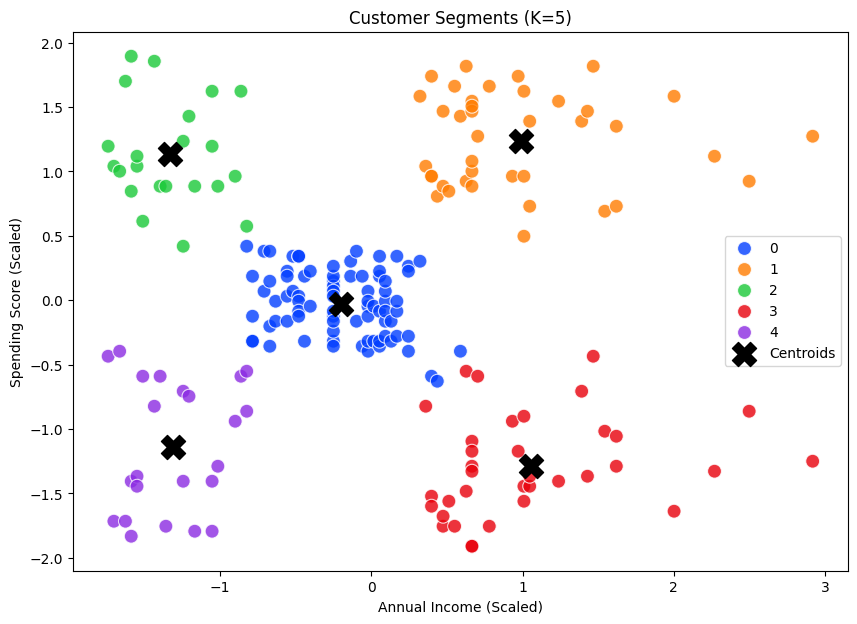

In [5]:
# Initialize K-Means with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels back to our original dataframe for analysis
df['Cluster'] = y_kmeans

# Plotting
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['Cluster'], 
                palette='bright', s=100, alpha=0.8)

# Plotting Centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='black', marker='X', label='Centroids')

plt.title('Customer Segments (K=5)')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.legend()
plt.show()

### **Principal Component Analysis (Wine Dataset)**

In [6]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA

# Load Wine dataset
wine = load_wine()
X_wine = wine.data
y_wine = wine.target # The 3 types of wine

# Scaling is mandatory for PCA
X_wine_scaled = StandardScaler().fit_transform(X_wine)

# Initialize PCA to keep 3 components
pca = PCA(n_components=3)
pca_data = pca.fit_transform(X_wine_scaled)

# Check how much information we kept
variance = pca.explained_variance_ratio_
print(f"Total Variance Captured by 3 PCs: {sum(variance)*100:.2f}%")

Total Variance Captured by 3 PCs: 66.53%


### **Visualizing PCA (2D and 3D)**

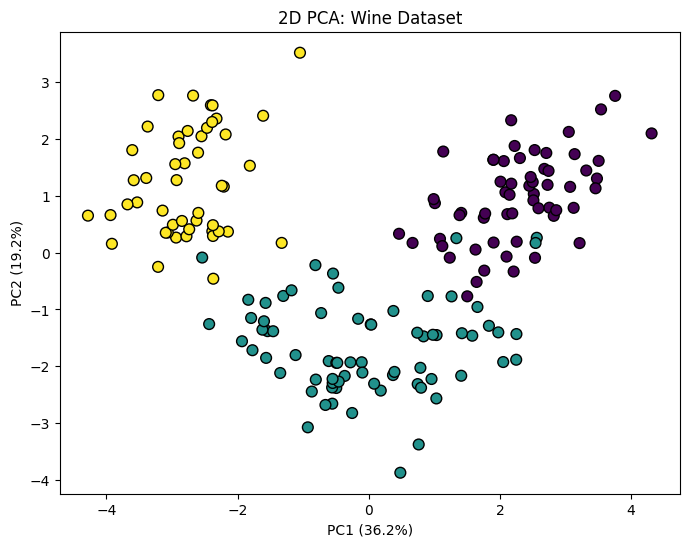

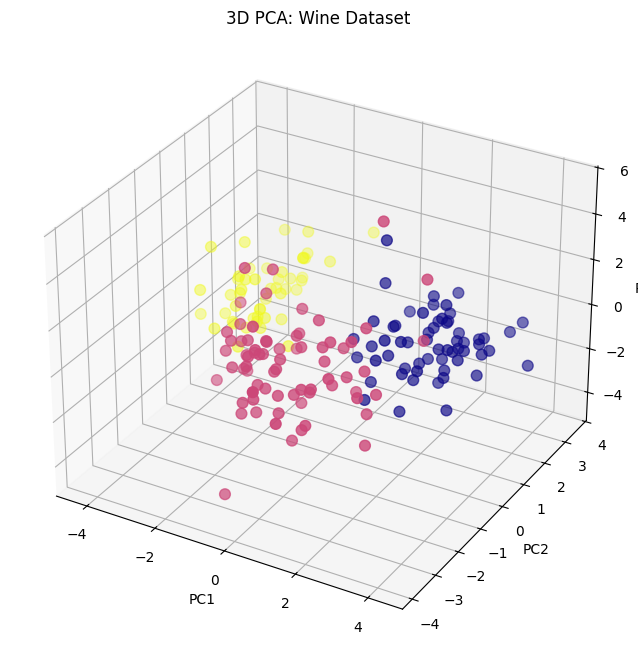

In [7]:
# 2D Visualization
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=y_wine, cmap='viridis', edgecolor='k', s=60)
plt.title('2D PCA: Wine Dataset')
plt.xlabel(f'PC1 ({variance[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({variance[1]*100:.1f}%)')
plt.show()

# 3D Visualization
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=y_wine, cmap='plasma', s=60)

ax.set_title('3D PCA: Wine Dataset')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()


## **Conclusion**

1. K-Means Clustering (Segmentation)
   Result: The algorithm successfully grouped customers into 5 distinct profiles (e.g., "High-Income/High-Spending" vs. "Low-Income/Low-Spending").

   Key Lesson: Scaling is mandatory. Without it, the "Annual Income" numbers would have overwhelmed the "Spending Score," leading to inaccurate   clusters.

   Centroids: Marking the centers helped define the "average" customer for each marketing category.

2. PCA (Dimensionality Reduction)
   Result: We compressed 13 chemical features of wine into 2 or 3 Principal Components while keeping most of the important information.

   Key Lesson: PCA removes "noise" and allows us to visualize high-dimensional data in 2D or 3D plots.

   Variance: The "Explained Variance Ratio" tells us exactly how much of the original data's "soul" was captured in our simplified plot.